# Cloning the api model

In [ ]:
# clone the tensorflow models on the colab cloud vm
!git clone --q https://github.com/tensorflow/models.git

#navigate to /models/research folder to compile protos
%cd models/research

# Compile protos.
!protoc object_detection/protos/*.proto --python_out=.

# Install TensorFlow Object Detection API.
!cp object_detection/packages/tf2/setup.py .
!python -m pip install .


/content/models/research
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/models/research
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     |████████████████████████████████| 14.5 MB 8.3 MB/s 
     |████████████████████████████████| 352 kB 65.5 MB/s 
     |████████████████████████████████| 2.4 MB 49.3 MB/s 
     |████████████████████████████████| 26.9 MB 1.7 MB/s 
     |████████████████████████████████| 67 kB 5.3 MB/s 
     |████████████████████████████████| 116 kB 65.1 MB/s 
     |████████████████████████████████| 1.3 MB 67.3 MB/s 
     |████████████████████████████████| 

In [ ]:
%cd /content/models/research/object_detection

/content/models/research/object_detection


# Importing libraries

In [ ]:
#Loading the saved_model
import tensorflow as tf
import time
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from PIL import Image
from google.colab.patches import cv2_imshow
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

from object_detection.utils import ops as utils_ops
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

from object_detection.utils import config_util
from object_detection.utils import colab_utils
from object_detection.builders import model_builder

import itertools
import cv2

# Running it on a single image

In [ ]:
IMAGE_SIZE = (4, 6) # Output display size as you want
import matplotlib.pyplot as plt

In [ ]:
PATH_TO_SAVED_MODEL="/content/drive/MyDrive/datasets/customtf2/model_50000/saved_model"
print('Loading model...', end='')

Loading model...

In [ ]:
# Load saved model and build the detection function
detect_fn=tf.saved_model.load(PATH_TO_SAVED_MODEL)
print('Done!')

Done!


In [ ]:
category_index=label_map_util.create_category_index_from_labelmap("/content/drive/MyDrive/datasets/customtf2/label_map.pbtxt",use_display_name=True)

In [ ]:
def load_image_into_numpy_array(path):

    return np.array(Image.open(path))

In [ ]:
image_path="/content/drive/MyDrive/datasets/customtf2/images/hard_hat_workers1039.png"

In [ ]:
image_np = load_image_into_numpy_array(image_path)

In [ ]:
# The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
input_tensor = tf.convert_to_tensor(image_np)
# The model expects a batch of images, so add an axis with `tf.newaxis`.
input_tensor = input_tensor[tf.newaxis, ...]

detections = detect_fn(input_tensor)

In [ ]:
detections

{'detection_multiclass_scores': <tf.Tensor: shape=(1, 100, 91), dtype=float32, numpy=
 array([[[2.77343963e-04, 7.42668569e-01, 1.17881475e-02, ...,
          3.48562934e-02, 1.10039981e-02, 1.12178456e-02],
         [4.14915878e-04, 7.30459929e-01, 4.32573492e-03, ...,
          9.02951695e-03, 6.28214842e-03, 2.23147590e-03],
         [6.70898240e-04, 3.33719909e-01, 1.29020233e-02, ...,
          1.38988625e-02, 8.88202712e-03, 1.50308283e-02],
         ...,
         [9.13006428e-04, 6.13207370e-02, 3.28401215e-02, ...,
          2.04761233e-03, 2.29787342e-02, 1.03490734e-02],
         [6.89811364e-04, 4.36807536e-02, 2.03784071e-02, ...,
          9.84977745e-03, 5.62943984e-03, 3.31338979e-02],
         [1.99537817e-03, 5.68142459e-02, 2.01425049e-02, ...,
          4.35530907e-03, 6.78060297e-03, 7.48394895e-03]]], dtype=float32)>,
 'num_detections': <tf.Tensor: shape=(1,), dtype=float32, numpy=array([100.], dtype=float32)>,
 'raw_detection_boxes': <tf.Tensor: shape=(1, 12804, 4

In [ ]:
num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

In [ ]:
# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

image_np_with_detections = image_np.copy()

In [ ]:
viz_utils.visualize_boxes_and_labels_on_image_array(
      image_np_with_detections,
      detections['detection_boxes'],
      detections['detection_classes'],
      detections['detection_scores'],
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=200,
      min_score_thresh=.5, # Adjust this value to set the minimum probability boxes to be classified as True
      agnostic_mode=False)

array([[[173, 194, 195],
        [173, 194, 195],
        [172, 193, 194],
        ...,
        [ 10,  26,  85],
        [  9,  25,  86],
        [  7,  23,  84]],

       [[185, 206, 207],
        [183, 204, 205],
        [182, 203, 204],
        ...,
        [ 13,  29,  88],
        [ 11,  30,  90],
        [ 12,  28,  89]],

       [[189, 210, 211],
        [187, 208, 209],
        [185, 206, 207],
        ...,
        [ 12,  31,  91],
        [ 11,  31,  91],
        [ 12,  31,  91]],

       ...,

       [[132,  77,  57],
        [127,  72,  54],
        [115,  62,  44],
        ...,
        [ 15,  19,  18],
        [ 18,  23,  19],
        [ 23,  27,  26]],

       [[ 90,  35,  15],
        [ 98,  43,  23],
        [107,  54,  36],
        ...,
        [ 12,  16,  15],
        [ 11,  15,  14],
        [ 12,  16,  15]],

       [[ 98,  46,  25],
        [103,  51,  30],
        [114,  61,  43],
        ...,
        [  8,  14,  14],
        [  6,  12,  12],
        [  6,  12,  12]]

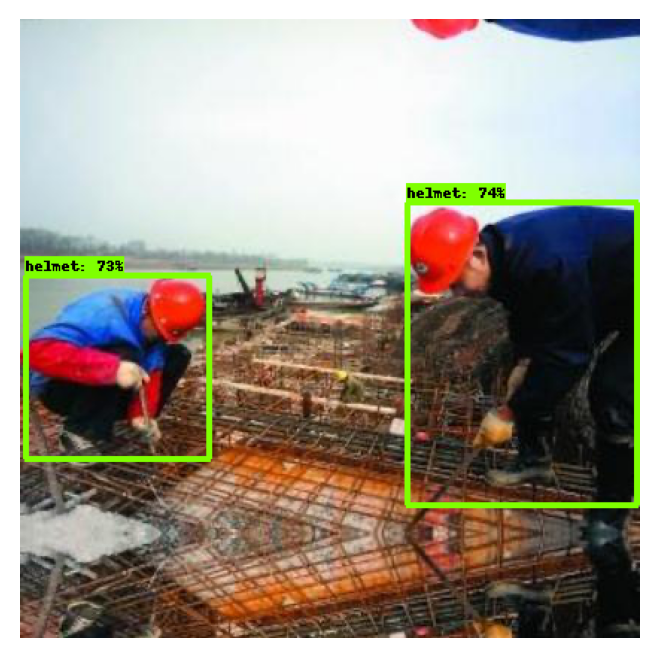

In [ ]:
%matplotlib inline
plt.figure(figsize=IMAGE_SIZE, dpi=200)
plt.axis("off")
plt.imshow(image_np_with_detections)
plt.show()

# Running it on a youtube video

In [ ]:
def visualise_on_image(image, bboxes, labels, scores, thresh):
    (h, w, d) = image.shape
    for bbox, label, score in zip(bboxes, labels, scores):
        if score > thresh:
            xmin, ymin = int(bbox[1]*w), int(bbox[0]*h)
            xmax, ymax = int(bbox[3]*w), int(bbox[2]*h)

            cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (0,255,0), 2)
            cv2.putText(image, f"{label}: {int(score*100)} %", (xmin, ymin), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2)
    return image


In [ ]:
input_tensor = tf.convert_to_tensor(image_np)[tf.newaxis, ...]
detections = detect_fn(input_tensor)


In [ ]:
score_thresh = 0.4   # Minimum threshold for object detection
max_detections = 10

In [ ]:
scores = detections['detection_scores'][0, :max_detections].numpy()
bboxes = detections['detection_boxes'][0, :max_detections].numpy()
labels = detections['detection_classes'][0, :max_detections].numpy().astype(np.int64)